<a href="https://colab.research.google.com/github/PieroPastor/breast-cancer-predicting/blob/main/breast_cancer_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''''''''''''''''''''''''''''''''

------AUTHOR: PIERO PASTOR-------

'''''''''''''''''''''''''''''''''

import keras
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('cancer1.csv')
df.head()
#1 = Benign / 0 = Malignant

,id,diagnosis,radius_0ean,texture_0ean,peri0eter_0ean,area_0ean,s0oothness_0ean,co0pactness_0ean,concavity_0ean,concave points_0ean,sy00etry_0ean,fractal_di0ension_0ean,radius_se,texture_se,peri0eter_se,area_se,s0oothness_se,co0pactness_se,concavity_se,concave points_se,sy00etry_se,fractal_di0ension_se,radius_worst,texture_worst,peri0eter_worst,area_worst,s0oothness_worst,co0pactness_worst,concavity_worst,concave points_worst,sy00etry_worst,fractal_di0ension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = df.drop(columns=["id", "diagnosis"])
y = df[["diagnosis"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

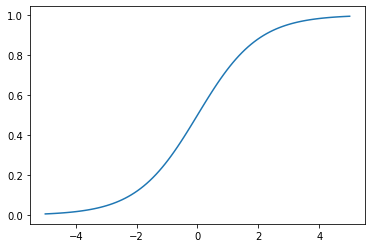

In [ ]:
import matplotlib.pyplot as plt

sigm = lambda x: 1 / (1 + np.e ** (-x))
_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm(_x))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='sigmoid', input_shape=(30,)))
model.add(keras.layers.Dense(32, activation='sigmoid'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x, y, epochs=560, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/560
18/18 [==============================] - 0s 4ms/step - loss: 0.0407
Epoch 2/560
18/18 [==============================] - 0s 5ms/step - loss: 0.0408
Epoch 3/560
18/18 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 4/560
18/18 [==============================] - 0s 4ms/step - loss: 0.0427
Epoch 5/560
18/18 [==============================] - 0s 5ms/step - loss: 0.0437
Epoch 6/560
18/18 [==============================] - 0s 4ms/step - loss: 0.0424
Epoch 7/560
18/18 [==============================] - 0s 5ms/step - loss: 0.0377
Epoch 8/560
18/18 [==============================] - 0s 3ms/step - loss: 0.0380
Epoch 9/560
18/18 [==============================] - 0s 7ms/step - loss: 0.0490
Epoch 10/560
18/18 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 11/560
18/18 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 12/560
18/18 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 13/560
18/18 [=================

In [ ]:
test = np.array([17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890])
test.shape

(30,)

In [ ]:
a = model.predict(test.reshape(1, 30), batch_size=1)

z = int(a)

if z < 0.5:
  print(a, ", that means the tumor is Malignant")
elif z > 0.5:
  print(a, ", that means the tumor is Benign")

[[0.00287507]] , that means the tumor is Malignant


In [ ]:
y_preds = model.predict(x_test)
y_preds = np.round(y_preds, decimals=0)


from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_preds)
print(matrix)
#positive = benign / negative = malignant

[[46  2]
 [ 2 64]]


Text(30.5, 0.5, 'True')

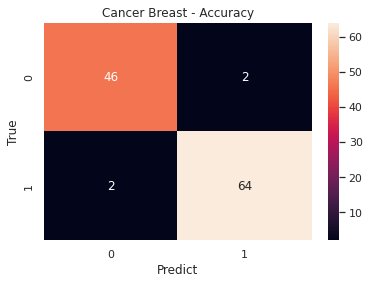

In [ ]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(matrix,annot=True,ax=ax)
ax.set_title('Cancer Breast - Accuracy')
ax.set_xlabel('Predict')
ax.set_ylabel('True')